# 1. Import and Install Dependencies

In [3]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

In [158]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [94]:
LEFT_EYE=[ 362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385,384, 398 ]
# right eyes indices 
RIGHT_EYE=[ 33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161 , 246 ]  
LEFT_IRIS = [474,475, 476, 477] 
RIGHT_IRIS = [469, 470, 471, 472]

In [95]:
mp_face_mesh = mp.solutions.face_mesh # FaceMesh Model
#mp_drawing_styles = mp.solutions.drawing_styles
mp_drawing = mp.solutions.drawing_utils # Drawing utilites

In [98]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [99]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)   # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                     # Image is no longer writeable
    results = model.process(image)                    # Make prediction
    image.flags.writeable = True                      # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)    # COLOR CONVERSION RGB 2 BGR
    return image, results

In [102]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [85]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.)
    mp_drawing.draw_landmarks(image, results.face_irises, mp_face_mesh.FACEMESH_IRISES)
    mp_drawing.draw_landmarks(image, results.face_faceoval, mp_face_mesh.FACEMESH_FACE_OVAL)
    
    

In [118]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 

In [87]:
cap = cv2.VideoCapture(0)
# set mediapipe model
with mp_face_mesh.FaceMesh(
    max_num_faces =1,
    refine_landmarks = True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():

        # Read feed
        ret,frame = cap.read()

        # Make Detections
        image , results = mediapipe_detection(frame,face_mesh)
        print(results)

        # Draw landmarks
        #draw_landmarks(image,results)
        


        # Show to Screen
        cv2.imshow('OpenCV feed', image)

        # Break gracefully
        k = cv2.waitKey(30) & 0xff # press ESC to exit
        if k == 27 or cv2.getWindowProperty('OpenCV feed', 0)<0:
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [167]:
cap = cv2.VideoCapture(0)
map_face_mesh = mp.solutions.face_mesh
# Set mediapipe model 
with map_face_mesh.FaceMesh(min_detection_confidence =0.5, min_tracking_confidence=0.5) as face_mesh:

    # starting time here 
    start_time = time.time()
    # starting Video loop here.
    while True:
        frame_counter +=1 # frame counter
        ret, frame = camera.read() # getting frame from camera 
        if not ret: 
            break # no more frames break
        #  resizing frame
        
        frame = cv.resize(frame, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)
        frame_height, frame_width= frame.shape[:2]
        rgb_frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
        results  = face_mesh.process(rgb_frame)
        if results.multi_face_landmarks:
            mesh_coords = landmarksDetection(frame, results, False)
            ratio = blinkRatio(frame, mesh_coords, RIGHT_EYE, LEFT_EYE)
            # cv.putText(frame, f'ratio {ratio}', (100, 100), FONTS, 1.0, utils.GREEN, 2)
            utils.colorBackgroundText(frame,  f'Ratio : {round(ratio,2)}', FONTS, 0.7, (30,100),2, utils.PINK, utils.YELLOW)

            if ratio >5.5:
                CEF_COUNTER +=1
                # cv.putText(frame, 'Blink', (200, 50), FONTS, 1.3, utils.PINK, 2)
                utils.colorBackgroundText(frame,  f'Blink', FONTS, 1.7, (int(frame_height/2), 100), 2, utils.YELLOW, pad_x=6, pad_y=6, )

            else:
                if CEF_COUNTER>CLOSED_EYES_FRAME:
                    TOTAL_BLINKS +=1
                    CEF_COUNTER =0
            # cv.putText(frame, f'Total Blinks: {TOTAL_BLINKS}', (100, 150), FONTS, 0.6, utils.GREEN, 2)
            utils.colorBackgroundText(frame,  f'Total Blinks: {TOTAL_BLINKS}', FONTS, 0.7, (30,150),2)
            
            cv.polylines(frame,  [np.array([mesh_coords[p] for p in LEFT_EYE ], dtype=np.int32)], True, utils.GREEN, 1, cv.LINE_AA)
            cv.polylines(frame,  [np.array([mesh_coords[p] for p in RIGHT_EYE ], dtype=np.int32)], True, utils.GREEN, 1, cv.LINE_AA)

            # Blink Detector Counter Completed
            right_coords = [mesh_coords[p] for p in RIGHT_EYE]
            left_coords = [mesh_coords[p] for p in LEFT_EYE]
            crop_right, crop_left = eyesExtractor(frame, right_coords, left_coords)
            # cv.imshow('right', crop_right)
            # cv.imshow('left', crop_left)
            eye_position, color = positionEstimator(crop_right)
            utils.colorBackgroundText(frame, f'R: {eye_position}', FONTS, 1.0, (40, 220), 2, color[0], color[1], 8, 8)
            eye_position_left, color = positionEstimator(crop_left)
            utils.colorBackgroundText(frame, f'L: {eye_position_left}', FONTS, 1.0, (40, 320), 2, color[0], color[1], 8, 8)
            
            


        # calculating  frame per seconds FPS
        end_time = time.time()-start_time
        fps = frame_counter/end_time

        frame =utils.textWithBackground(frame,f'FPS: {round(fps,1)}',FONTS, 1.0, (30, 50), bgOpacity=0.9, textThickness=2)
        # writing image for thumbnail drawing shape
        # cv.imwrite(f'img/frame_{frame_counter}.png', frame)
        cv.imshow('frame', frame)
        key = cv.waitKey(2)
        if key==ord('q') or key ==ord('Q'):
            break
    cv.destroyAllWindows()
    camera.release()


NameError: name 'frame_counter' is not defined

In [126]:
len(results.face_landmarks.landmark)

468

In [124]:
draw_styled_landmarks(frame, results)

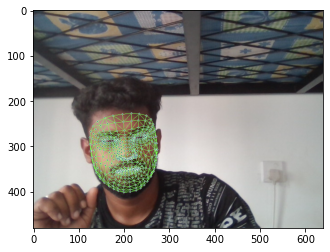

In [122]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [129]:
len(results.face_landmarks.landmark)

468

In [133]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.x, res.visibility])
    face.append(test)

In [145]:
def extract_keypoints(results):
    face = np.array([[res.x , res.y , res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*4)
    return np.concatenate([face])

In [147]:
extract_keypoints(results).shape

(1872,)

In [165]:
os.path

<module 'ntpath' from 'C:\\Anaconda\\lib\\ntpath.py'>

# 5. Collect Keypoint Values for Training and Testing